# <center><h1 style="font-size:36px;">Crime Analytics Across Indian Cities</h1></center>
<hr style="border: 1px solid black;">


### <center><h1>Project Overview </h1></center>

This project provides an analysis of crime data from 29 cities in India, focusing on the distribution of crimes across various demographics, including gender, age, and city. The analysis also examines crime trends over time and evaluates the efficiency of law enforcement in closing cases. Special attention is given to the cities of Nagpur and Pune, where comparisons are made regarding crime rates and case resolution times.


📝 Note:
The data does not represent all crimes in India but provides a snapshot based on 29 major cities. The dataset was sourced from Kaggle, and the analysis is limited to the available data.

# Importing libraries & CSV file

In [1]:
#Importing important libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

<div style="page-break-after: always;"></div>

In [2]:
#We import here CSV file from device
data = pd.read_csv(r"C:\\Users\\OM\\Desktop\\Excel data\\crime_dataset_india.csv")
data.head(3)

,Report Number,Date Reported,Date of Occurrence,Time of Occurrence,City,Crime Code,Crime Description,Victim Age,Victim Gender,Weapon Used,Crime Domain,Police Deployed,Case Closed,Date Case Closed
0,1,02-01-2020 00:00,01-01-2020 00:00,01-01-2020 01:11,Ahmedabad,576,IDENTITY THEFT,16,M,Blunt Object,Violent Crime,13,No,NaN
1,2,01-01-2020 19:00,01-01-2020 01:00,01-01-2020 06:26,Chennai,128,HOMICIDE,37,M,Poison,Other Crime,9,No,NaN
2,3,02-01-2020 05:00,01-01-2020 02:00,01-01-2020 14:30,Ludhiana,271,KIDNAPPING,48,F,Blunt Object,Other Crime,15,No,NaN


In [3]:
# Checking Blank value in all columns
(data.isnull().sum()*len(data))//100

Report Number               0
Date Reported               0
Date of Occurrence          0
Time of Occurrence          0
City                        0
Crime Code                  0
Crime Description           0
Victim Age                  0
Victim Gender               0
Weapon Used                 0
Crime Domain                0
Police Deployed             0
Case Closed                 0
Date Case Closed      8071356
dtype: int64

In [4]:
#For blanks in "Date Case Closed" we will replace them with "NA"
data["Date Case Closed"] = data["Date Case Closed"].fillna("NA")

In [5]:
#Checking the data types of all columns
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40160 entries, 0 to 40159
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Report Number       40160 non-null  int64 
 1   Date Reported       40160 non-null  object
 2   Date of Occurrence  40160 non-null  object
 3   Time of Occurrence  40160 non-null  object
 4   City                40160 non-null  object
 5   Crime Code          40160 non-null  int64 
 6   Crime Description   40160 non-null  object
 7   Victim Age          40160 non-null  int64 
 8   Victim Gender       40160 non-null  object
 9   Weapon Used         40160 non-null  object
 10  Crime Domain        40160 non-null  object
 11  Police Deployed     40160 non-null  int64 
 12  Case Closed         40160 non-null  object
 13  Date Case Closed    40160 non-null  object
dtypes: int64(4), object(10)
memory usage: 4.3+ MB


<div style="page-break-after: always;"></div>

In [6]:
#Counting unique values in each column
data.nunique()

Report Number         40160
Date Reported         25546
Date of Occurrence    40160
Time of Occurrence    39886
City                     29
Crime Code              500
Crime Description        21
Victim Age               70
Victim Gender             3
Weapon Used               7
Crime Domain              4
Police Deployed          19
Case Closed               2
Date Case Closed      16012
dtype: int64

In [7]:
#Converting "Date Reported" and "Date of Occurrence" columns to datetime format
data["Date Reported"]=pd.to_datetime(data["Date Reported"],format="%d-%m-%Y %H:%M")
data["Date of Occurrence"]=pd.to_datetime(data["Date of Occurrence"],format="%m-%d-%Y %H:%M")

In [8]:
# Separating date and time from "Date Reported" and "Date of Occurrence" columns
data["Reported date"]=data["Date Reported"].dt.strftime("%d-%m-%Y")
data["Reported Time"]=data["Date Reported"].dt.strftime("%H:%M:%S")
data["Occurrence date"]=data["Date of Occurrence"].dt.strftime("%d-%m-%Y")
data["Occurrence Time"]=data["Date of Occurrence"].dt.strftime("%H:%M:%S")

In [9]:
order=["Reported date", "Reported Time", "Occurrence date", "Occurrence Time", "City", "Crime Code", "Crime Description", "Victim Age", "Victim Gender", "Weapon Used", "Crime Domain", "Police Deployed", "Case Closed", "Date Case Closed", "Time of Occurrence"]
data=data[order]
data.head(3)

,Reported date,Reported Time,Occurrence date,Occurrence Time,City,Crime Code,Crime Description,Victim Age,Victim Gender,Weapon Used,Crime Domain,Police Deployed,Case Closed,Date Case Closed,Time of Occurrence
0,02-01-2020,00:00:00,01-01-2020,00:00:00,Ahmedabad,576,IDENTITY THEFT,16,M,Blunt Object,Violent Crime,13,No,NA,01-01-2020 01:11
1,01-01-2020,19:00:00,01-01-2020,01:00:00,Chennai,128,HOMICIDE,37,M,Poison,Other Crime,9,No,NA,01-01-2020 06:26
2,02-01-2020,05:00:00,01-01-2020,02:00:00,Ludhiana,271,KIDNAPPING,48,F,Blunt Object,Other Crime,15,No,NA,01-01-2020 14:30


<div style="page-break-after: always;"></div>

# Number of Crimes per City

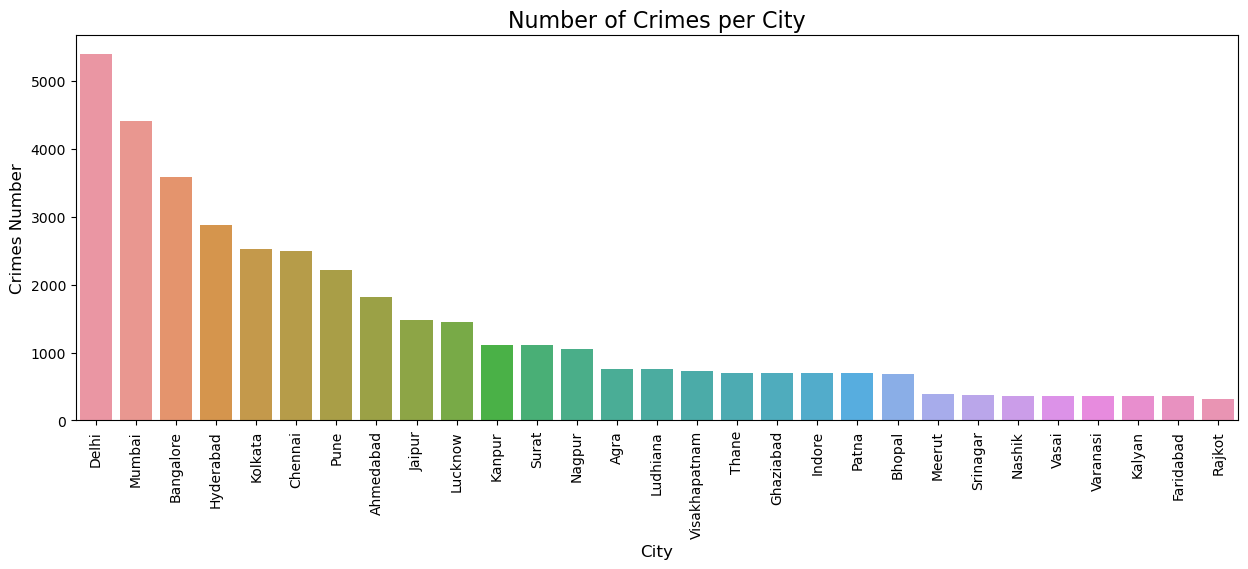

In [10]:
plt.figure(figsize=(15,5))
sns.countplot(data=data, x="City", order=data["City"].value_counts().index)
plt.xticks(rotation=90)
plt.title('Number of Crimes per City', fontsize=16)
plt.xlabel('City', fontsize=12)
plt.ylabel('Crimes Number', fontsize=12)
plt.show()

According to the data, the cities with the highest crime rates are major metropolitan areas like Delhi, Mumbai, Bangalore, Hyderabad, and Kolkata. These cities have the most reported crime occurrences, likely due to their larger populations and urban environments.


<div style="page-break-after: always;"></div>

# Crimes by Gender

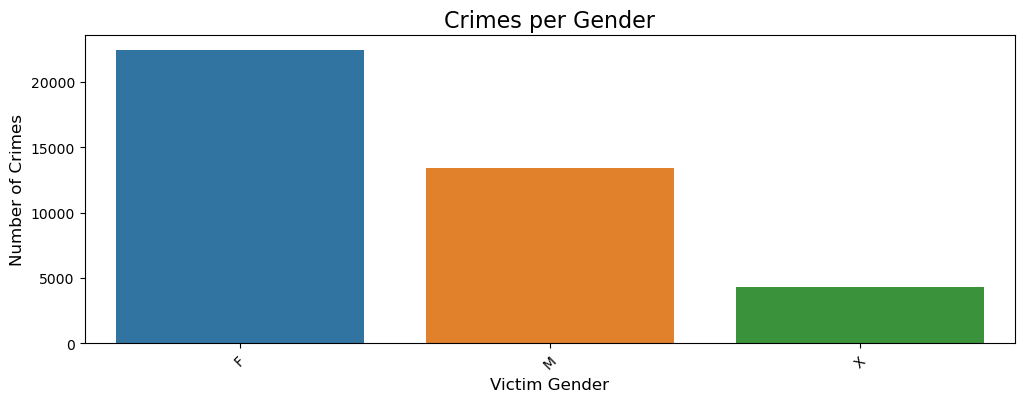

In [11]:
plt.figure(figsize=(12,4))
sns.countplot(data=data, x="Victim Gender", order=data["Victim Gender"].value_counts().index)
plt.xticks(rotation=45)
plt.title('Crimes per Gender', fontsize=16)
plt.xlabel('Victim Gender', fontsize=12)
plt.ylabel('Number of Crimes', fontsize=12)
plt.show()

The data shows that the majority of crime victims are female across all reported cases. This highlights the need for gender-specific policies and protection measures, especially for women in crime-prone areas.

<div style="page-break-after: always;"></div>

# Sexual Assault Cases by City

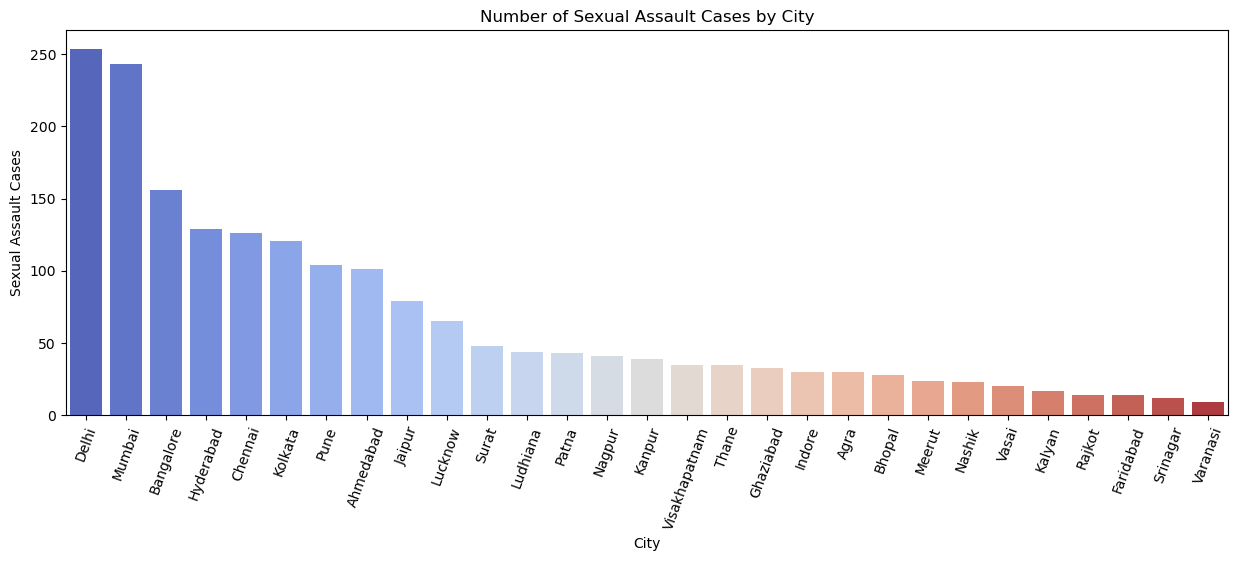

In [12]:
# Filtering data for sexual assault cases and counting occurrences by city
sexual_assault_data = data[data['Crime Description'] == 'SEXUAL ASSAULT']

# Count occurrences by city
sexual_assault_count = sexual_assault_data['City'].value_counts().reset_index()
sexual_assault_count.columns = ['City', 'Sexual Assault Count']

plt.figure(figsize=(15,5))
sns.barplot(x='City', y='Sexual Assault Count', data=sexual_assault_count, palette='coolwarm')
plt.title('Number of Sexual Assault Cases by City')
plt.xlabel('City')
plt.ylabel('Sexual Assault Cases')
plt.xticks(rotation=70)
plt.show()

The data indicates that sexual assault cases are concentrated in metro cities. The highest number of cases are reported in Delhi, Mumbai, and Bangalore, indicating that larger cities might face more challenges related to such crimes.

<div style="page-break-after: always;"></div>

# Comparison of Crime Distribution by Age Group and Gender

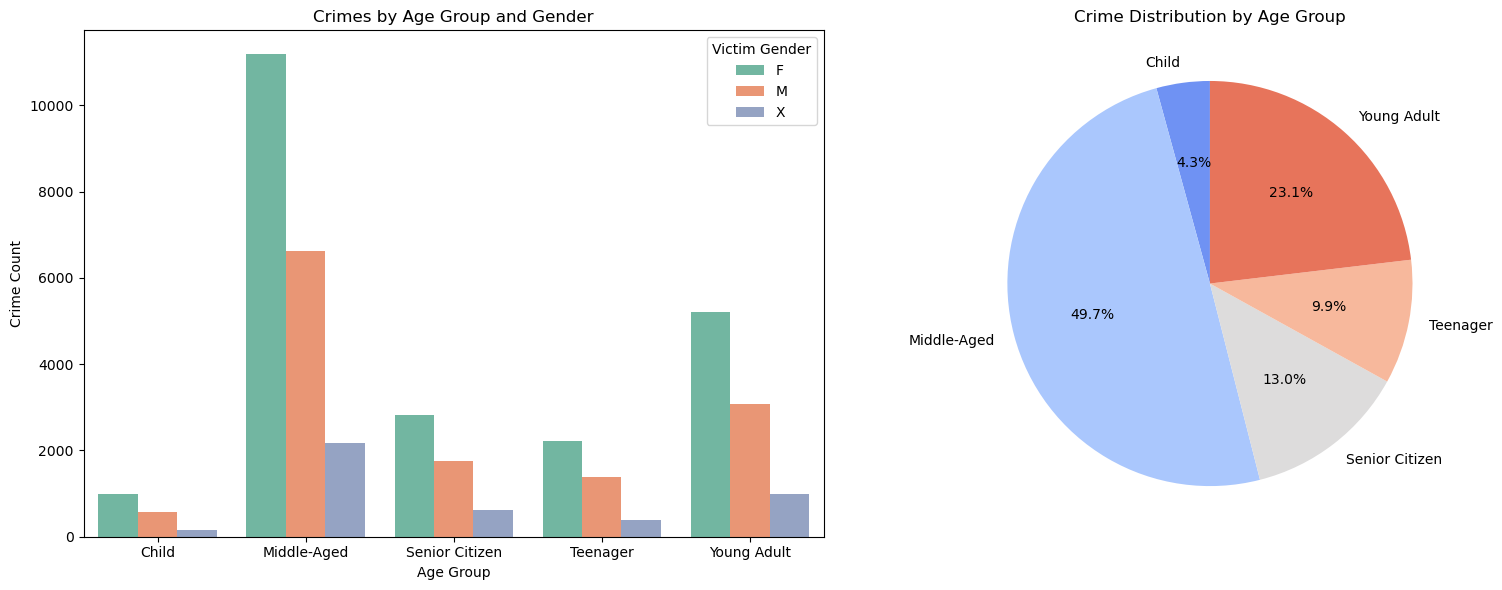

In [20]:
# Categorizing victim age groups and counting crimes by age group and gender
def age_category(age):
    if age <= 12:
        return "Child"
    elif 13 <= age <= 19:
        return "Teenager"
    elif 20 <= age <= 35:  
        return "Young Adult"
    elif 36 <= age <= 55:
        return "Middle-Aged"
    elif 56 <= age <= 70:
        return "Middle-Aged"
    elif age >= 71:
        return "Senior Citizen"
    else:
        return "Unknown"


data["Age_group"] = data["Victim Age"].apply(age_category)
age_gender_data = data.groupby(['Age_group', 'Victim Gender']).size().reset_index(name='Crime Count')
age_group_data = data.groupby('Age_group').size().reset_index(name='Crime Count')


fig, ax = plt.subplots(1, 2, figsize=(16, 6))

sns.barplot(x='Age_group', y='Crime Count', hue='Victim Gender', data=age_gender_data, ax=ax[0], palette='Set2')
ax[0].set_title('Crimes by Age Group and Gender')
ax[0].set_xlabel('Age Group')
ax[0].set_ylabel('Crime Count')
ax[0].legend(title='Victim Gender')

ax[1].pie(age_group_data['Crime Count'], labels=age_group_data['Age_group'], autopct='%1.1f%%', startangle=90, colors=sns.color_palette('coolwarm', len(age_group_data)))
ax[1].set_title('Crime Distribution by Age Group')
plt.tight_layout()
plt.show()


According to the data, The first chart, the data reveals that females are disproportionately represented across all age groups, emphasizing the urgent need for gender-specific crime prevention strategies and support systems. In the second chart shows that the middle-aged group (36-55 years old) represents the highest number of victims overall, indicating that this demographic is most affected by crime.

<div style="page-break-after: always;"></div>

# Average Days to Close a Case by Crime Description (All 29 Cities)

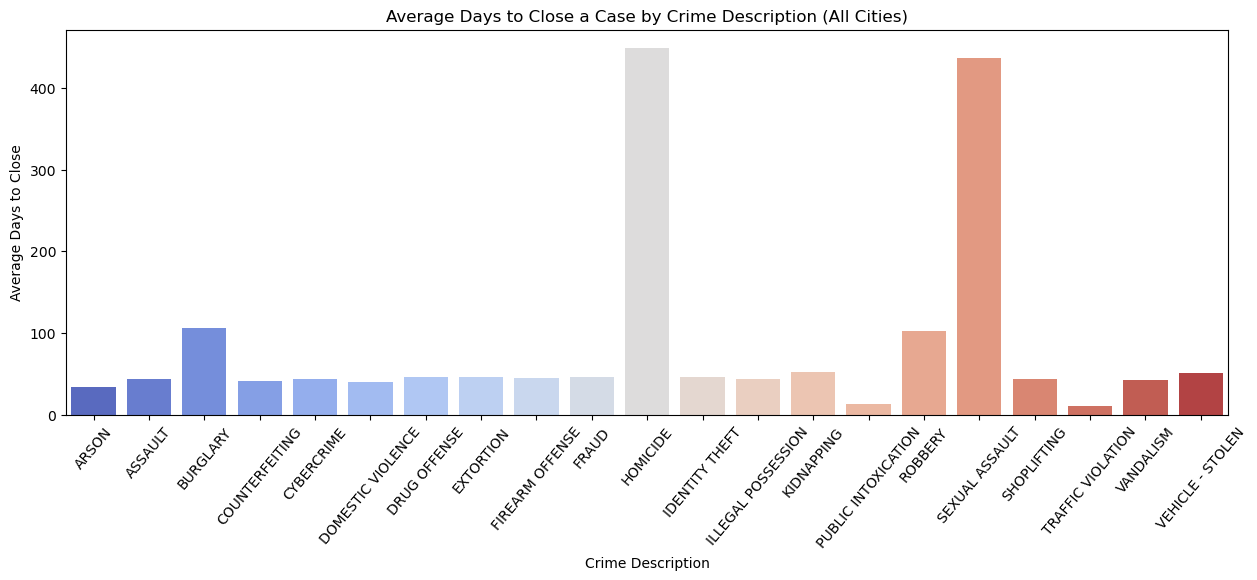

In [14]:
warnings.filterwarnings("ignore")

# Filter for cases that have been closed
closed_cases = data[data['Case Closed'] == 'Yes']
closed_cases['Reported date'] = pd.to_datetime(closed_cases['Reported date'], errors='coerce')
closed_cases['Date Case Closed'] = pd.to_datetime(closed_cases['Date Case Closed'], errors='coerce')

# Calculate the difference between Date Reported and Date Case Closed
closed_cases['Days to Close'] = (closed_cases['Date Case Closed'] - closed_cases['Reported date']).dt.days

# Group by Crime Description and calculate the average days to close a case
average_days_per_crime = closed_cases.groupby('Crime Description')['Days to Close'].mean().reset_index()

plt.figure(figsize=(15,5))
sns.barplot(x='Crime Description', y='Days to Close', data=average_days_per_crime, palette='coolwarm')
plt.title('Average Days to Close a Case by Crime Description (All Cities)')
plt.xlabel('Crime Description')
plt.ylabel('Average Days to Close')
plt.xticks(rotation=50)
plt.show()

The chart indicates that Homicide and Sexual Assault crimes take significantly more time to close, highlighting inefficiencies in the investigation and legal processes for serious crimes.

Homicide - Homicide is a general term and may refer to a noncriminal act as well as the criminal act of murder.


<div style="page-break-after: always;"></div>

<center><h1>Comparing Two Cities Nagpur & Pune</h1></center>
<hr style="border: 2px solid black;">

# Total Crimes in Nagpur vs Pune

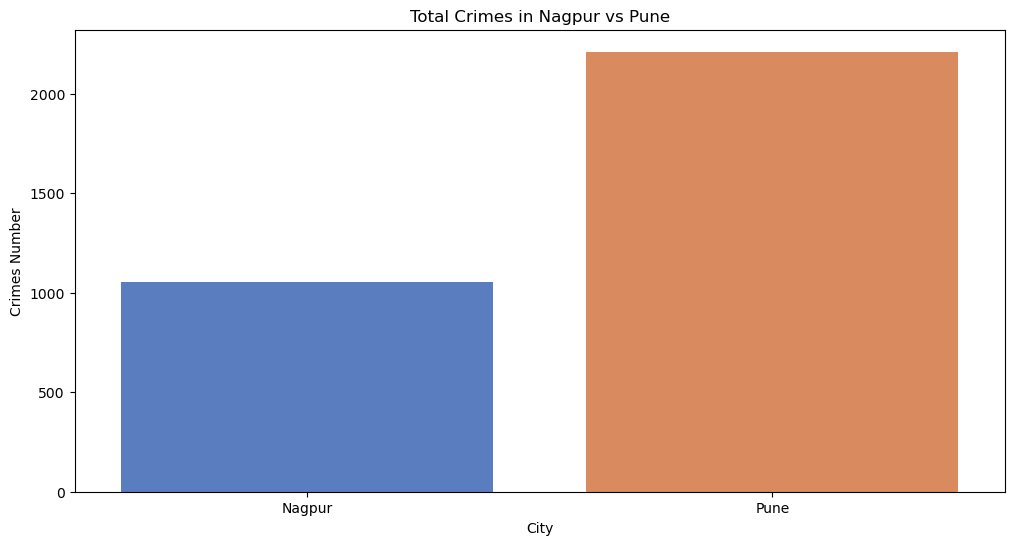

In [15]:
# Filter data for Nagpur and Pune
nagpur_pune_data = data[data['City'].isin(['Nagpur', 'Pune'])]

# Group by City and count the number of crimes
crime_count = nagpur_pune_data.groupby('City').size().reset_index(name='Crime Count')

plt.figure(figsize=(12,6))
sns.barplot(x='City', y='Crime Count', data=crime_count, palette='muted')
plt.title('Total Crimes in Nagpur vs Pune')
plt.xlabel('City')
plt.ylabel('Crimes Number')
plt.show()

The data shows that cities with the highest crime rates Is Pune as compair to Nagpur most reported crime occurrences, likely due to their larger populations and urban environments.

<div style="page-break-after: always;"></div>

# Crime Trends in Pune vs Nagpur (2020-2023)

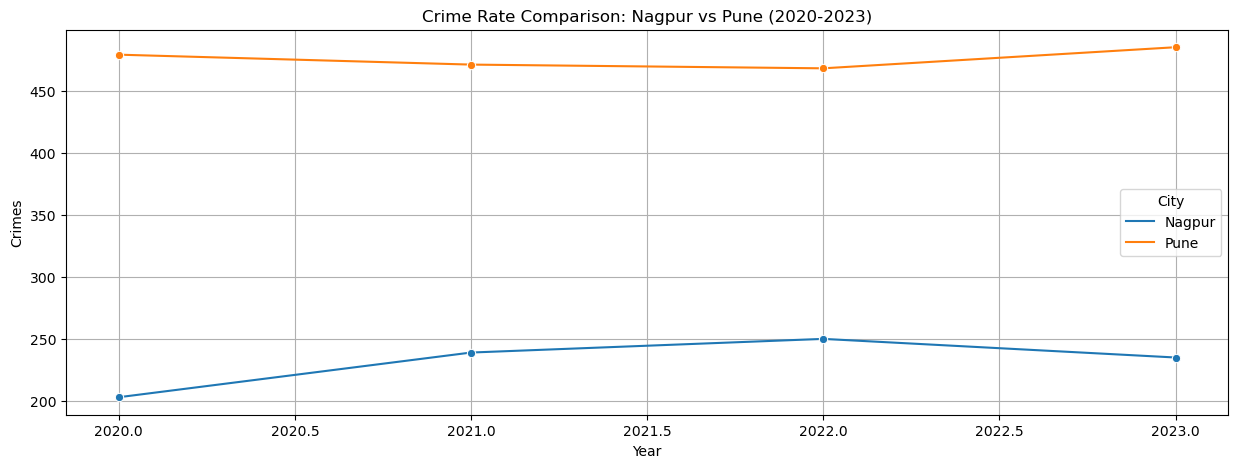

In [16]:
# Convert Reported date to year format and filter for 2020-2023
data["year"] = pd.to_datetime(data["Reported date"]).dt.year
filtered_data = data[(data['City'].isin(['Nagpur', 'Pune'])) & (data['year'].isin([2020, 2021, 2022, 2023]))]
crime_trend = filtered_data.groupby(['year', 'City']).size().reset_index(name='Crime Count')
plt.figure(figsize=(15,5))
sns.lineplot(x='year', y='Crime Count', hue='City', data=crime_trend, marker='o')
plt.title('Crime Rate Comparison: Nagpur vs Pune (2020-2023)')
plt.xlabel('Year')
plt.ylabel('Crimes')
plt.grid(True)
plt.show()

The data shows that in Pune, crime rates decreased in 2021 and 2022, but are rising again in 2023. Conversely, Nagpur saw increasing crime rates in 2021 and 2022, but a decline in 2023.

<div style="page-break-after: always;"></div>

# Victim Demographics by Age Group in Nagpur vs Pune

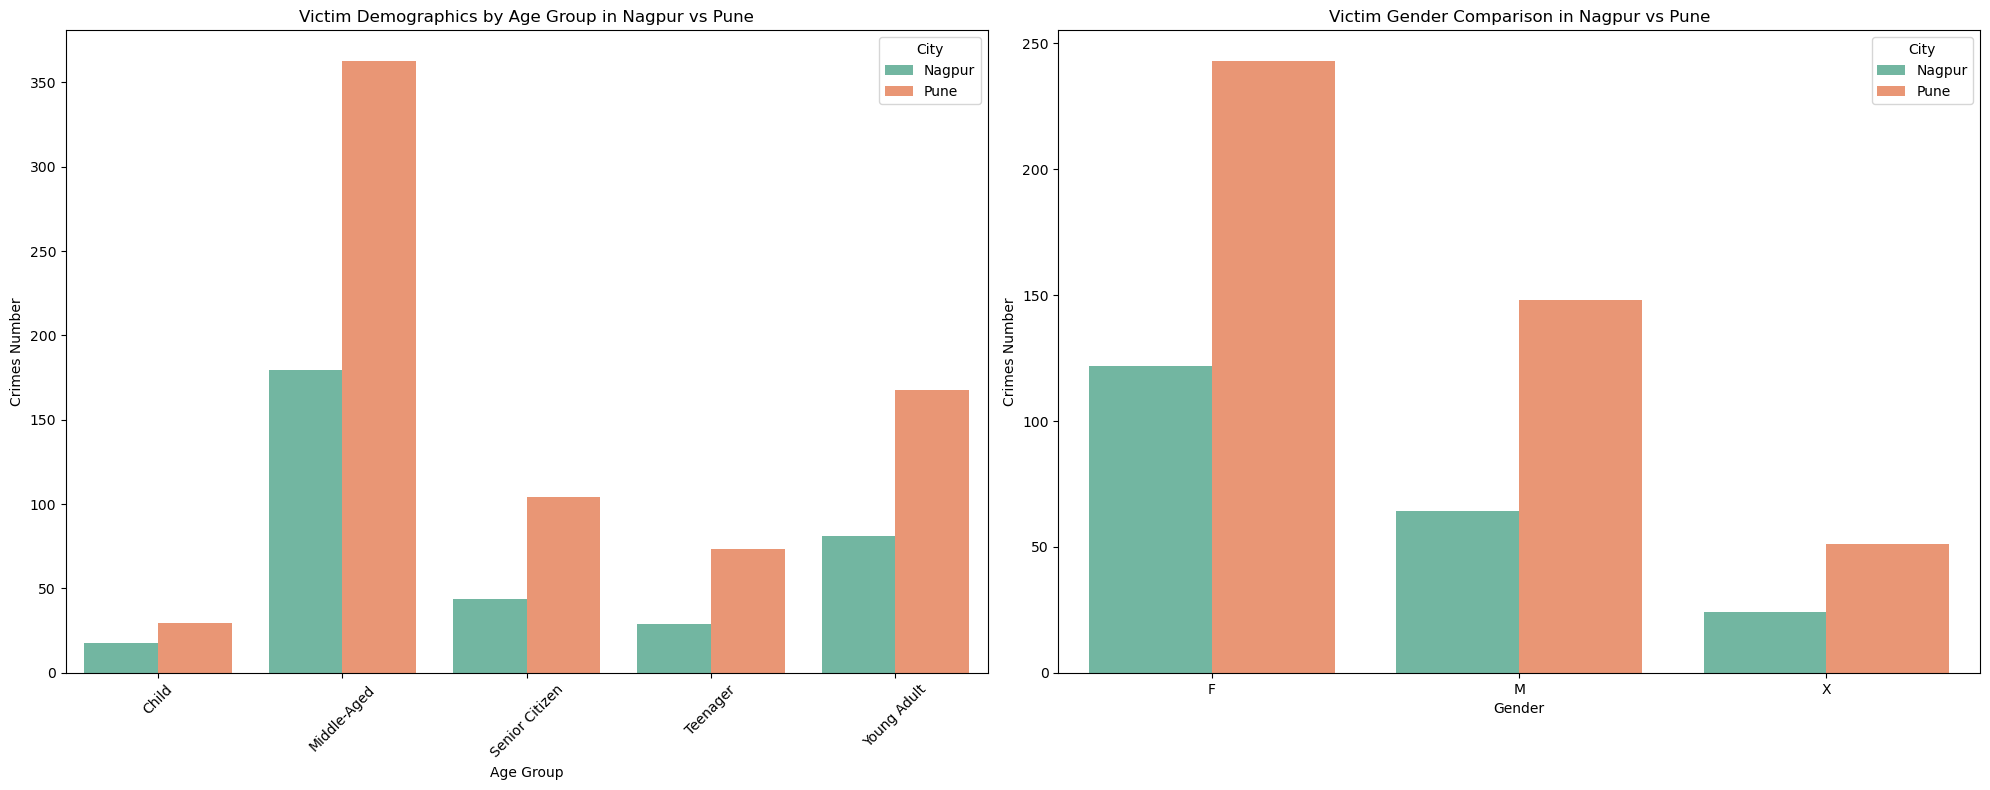

In [17]:
# Group by City, Age Group, and Gender to get victim counts
victim_demo = nagpur_pune_data.groupby(['City', 'Age_group', 'Victim Gender']).size().reset_index(name='Crime Count')
fig, ax = plt.subplots(1, 2, figsize=(20, 8))

# Plotting the Age Group comparison
sns.barplot(x='Age_group', y='Crime Count', hue='City', data=victim_demo, palette='Set2', ci=None, ax=ax[0])
ax[0].set_title('Victim Demographics by Age Group in Nagpur vs Pune')
ax[0].set_xlabel('Age Group')
ax[0].set_ylabel('Crimes Number')
ax[0].legend(title='City')
ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation=45)

# Plotting the Gender comparison
sns.barplot(x='Victim Gender', y='Crime Count', hue='City', data=victim_demo, palette='Set2', ci=None, ax=ax[1])
ax[1].set_title('Victim Gender Comparison in Nagpur vs Pune')
ax[1].set_xlabel('Gender')
ax[1].set_ylabel('Crimes Number')
ax[1].legend(title='City')
plt.tight_layout()
plt.show()


The data shows that Middle-aged victims (aged 36-55) are the most common in both Nagpur and Pune, with females making up the majority of victims in both cities. The chart emphasizes the importance of targeted safety measures for this age group and gender.

<div style="page-break-after: always;"></div>

# Comparison of Sexual Assault Cases in Nagpur vs Pune

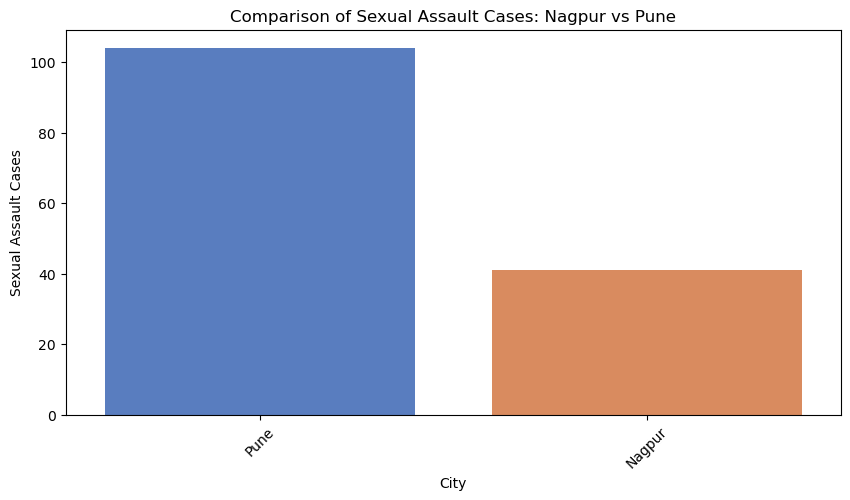

In [18]:
# Filter data for Nagpur and Pune regarding sexual assault
nagpur_pune_sexual_assault = sexual_assault_data[sexual_assault_data['City'].isin(['Nagpur', 'Pune'])]

nagpur_pune_count = nagpur_pune_sexual_assault['City'].value_counts().reset_index()
nagpur_pune_count.columns = ['City', 'Sexual Assault Count']

plt.figure(figsize=(10,5))
sns.barplot(x='City', y='Sexual Assault Count', data=nagpur_pune_count, palette='muted')
plt.title('Comparison of Sexual Assault Cases: Nagpur vs Pune')
plt.xlabel('City')
plt.ylabel('Sexual Assault Cases')
plt.xticks(rotation=45)
plt.show()

The data shows that Pune has a higher number of sexual assault cases compared to Nagpur. The chart highlights that this type of crime is more prevalent in Pune, which calls for stronger awareness and prevention measures.

<div style="page-break-after: always;"></div>

# Comparison of Average Days to Close a Case by Crime Description: Nagpur vs Pune

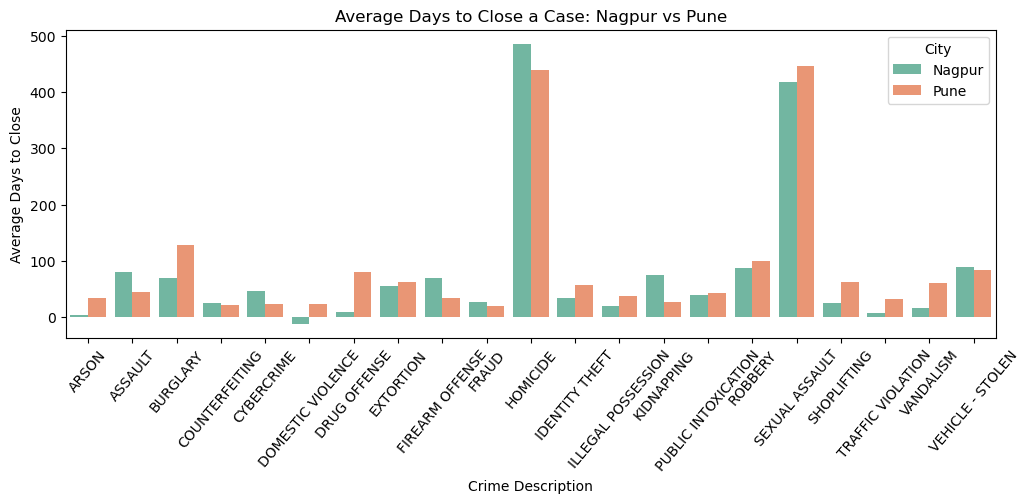

In [19]:
# Filter for Nagpur and Pune
nagpur_pune_cases = closed_cases[closed_cases['City'].isin(['Nagpur', 'Pune'])]

# Group by City and Crime Description, and calculate the average days to close a case
average_days_nagpur_pune = nagpur_pune_cases.groupby(['City', 'Crime Description'])['Days to Close'].mean().reset_index()

# Separate data for Nagpur and Pune
average_days_nagpur = average_days_nagpur_pune[average_days_nagpur_pune['City'] == 'Nagpur']
average_days_pune = average_days_nagpur_pune[average_days_nagpur_pune['City'] == 'Pune']

# Find the Crime Description that took the longest time to close in each city
max_days_nagpur = average_days_nagpur.loc[average_days_nagpur['Days to Close'].idxmax()]
max_days_pune = average_days_pune.loc[average_days_pune['Days to Close'].idxmax()]
plt.figure(figsize=(12,4))
sns.barplot(x='Crime Description', y='Days to Close', hue='City', data=average_days_nagpur_pune, palette='Set2')
plt.title('Average Days to Close a Case: Nagpur vs Pune')
plt.xlabel('Crime Description')
plt.ylabel('Average Days to Close')
plt.xticks(rotation=50)
plt.show()

The chart shows that in Nagpur, Homicide cases take longer to close, while in Pune, Sexual Assault cases take longer. This suggests that the investigation processes in Nagpur require more time, which could indicate inefficiencies in solving cases.

Homicide - Homicide is a general term and may refer to a noncriminal act as well as the criminal act of murder.

# Conclusion:

The analysis reveals that larger cities, such as Delhi, Mumbai, and Bangalore, experience higher crime rates due to their dense populations and urban environments. The majority of crime victims are female, and middle-aged individuals (36-55 years) are the most commonly affected group. Crimes like Homicide and Sexual Assault take significantly longer to resolve, indicating inefficiencies in the investigative processes. The comparison between Nagpur and Pune shows distinct crime trends, with Pune experiencing a higher overall crime rate and longer resolution times for sexual assault cases, while Nagpur faces challenges in resolving homicide cases.